# Name :- Mahammed Sabeer Ali
# Roll No :- 22
# Reg No :- 12200444
# Section :- K22UG

# Real Estate Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('hyderabad.csv')

In [14]:
df.shape

(9487, 55)

In [230]:
df.head()

,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM
0,70135726,Z70135726,S,"Hmda, rera approved residential apartments at ...",Residential Apartment,Secunderabad,1.0,1,2.0,5700.0,...,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",9.0,[{'text': '1 Library'}],Evolve,Evolve,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",1.0,2
1,68489968,A68489968,S,Own a 2 BHK apartment in Annes Fortune Greenho...,Residential Apartment,Hyderabad,2.0,1,2.0,6000.0,...,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",50.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
2,69555358,M69555358,S,This well-known project offers 4 BHK apartment...,Residential Apartment,Hyderabad,2.0,1,4.0,0.0,...,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
3,69555352,P69555352,S,Enjoy a blissful living experience in The Olym...,Residential Apartment,Hyderabad,2.0,1,3.0,20049.0,...,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",11.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
4,70237806,B70237806,S,Siva sai infra myra is a residential developme...,Independent House/Villa,Hyderabad,2.0,1,3.0,8999.0,...,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0,"[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPID                        9487 non-null   int64  
 1   PROP_ID                     9487 non-null   object 
 2   PREFERENCE                  9487 non-null   object 
 3   DESCRIPTION                 9487 non-null   object 
 4   PROPERTY_TYPE               9487 non-null   object 
 5   CITY                        9487 non-null   object 
 6   TRANSACT_TYPE               7911 non-null   float64
 7   OWNTYPE                     9487 non-null   int64  
 8   BEDROOM_NUM                 6673 non-null   float64
 9   PRICE_PER_UNIT_AREA         9487 non-null   float64
 10  FURNISH                     9487 non-null   int64  
 11  FACING                      9487 non-null   int64  
 12  AGE                         9487 non-null   int64  
 13  TOTAL_FLOOR                 8911 

In [234]:
print("\nCardinality of each column (number of unique values):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Cardinality of each column (number of unique values):
SPID: 9486 unique values
PROP_ID: 9486 unique values
PREFERENCE: 3 unique values
DESCRIPTION: 7578 unique values
PROPERTY_TYPE: 8 unique values
CITY: 2 unique values
TRANSACT_TYPE: 2 unique values
OWNTYPE: 5 unique values
BEDROOM_NUM: 28 unique values
PRICE_PER_UNIT_AREA: 3191 unique values
FURNISH: 4 unique values
FACING: 9 unique values
AGE: 6 unique values
TOTAL_FLOOR: 51 unique values
FEATURES: 2503 unique values
REGISTER_DATE: 160 unique values
POSTING_DATE: 9235 unique values
UPDATE_DATE: 9141 unique values
CLASS: 3 unique values
RES_COM: 1 unique values
PROP_NAME: 2808 unique values
PROPERTY_NUMBER: 28 unique values
MIN_PRICE: 3491 unique values
MAX_PRICE: 3503 unique values
PRICE_SQFT: 3191 unique values
PROJ_ID: 873 unique values
BUILDING_ID: 1040 unique values
VERIFIED: 2 unique values
MAP_DETAILS: 2023 unique values
MIN_AREA_SQFT: 1545 unique values
MAX_AREA_SQFT: 1589 unique values
AMENITIES: 2883 unique values
ALT_TAG:

In [237]:
df.drop(columns = ['SPID', 'PROP_ID', 'PROJ_ID', 'BUILDING_ID', 'REGISTER_DATE', 'POSTING_DATE', 
    'UPDATE_DATE', 'PROPERTY_NUMBER', 'EXPIRY_DATE', 'REGISTER_DATE__U',  
    'CLASS_LABEL', 'MAP_DETAILS', 'ALT_TAG', 'PRODUCT_TYPE', 'FORMATTED_LANDMARK_DETAILS',
    'PROP_NAME', 'SOCIETY_NAME', 'BUILDING_NAME', 'PROP_HEADING', 'CLASS_HEADING', 'location'
], inplace = True)


In [287]:
df['AVG_AREA_SQFT'] = (df['MIN_AREA_SQFT'] + df['MAX_AREA_SQFT']) / 2

In [289]:
df.isna().sum()

PREFERENCE              0
DESCRIPTION             0
PROPERTY_TYPE           0
CITY                    0
TRANSACT_TYPE           0
OWNTYPE                 0
BEDROOM_NUM             0
PRICE_PER_UNIT_AREA     0
FURNISH                 0
FACING                  0
AGE                     0
TOTAL_FLOOR             0
FEATURES                0
CLASS                   0
RES_COM                 0
MIN_PRICE               0
MAX_PRICE               0
PRICE_SQFT              0
VERIFIED                0
MIN_AREA_SQFT           0
MAX_AREA_SQFT           0
AMENITIES               0
TOP_USPS                0
PROPERTY_TYPE__U        0
AREA                    0
SECONDARY_AREA          0
PRICE                   0
VALUE_LABEL             0
REGISTERED_DAYS         0
PRIMARY_TAGS            0
SECONDARY_TAGS          0
TOTAL_LANDMARK_COUNT    0
BALCONY_NUM             0
FLOOR_NUM               0
AVG_AREA_SQFT           0
dtype: int64

In [243]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [245]:
numeric_cols

Index(['TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'MIN_PRICE', 'MAX_PRICE',
       'PRICE_SQFT', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'PROPERTY_TYPE__U',
       'TOTAL_LANDMARK_COUNT', 'BALCONY_NUM', 'AVG_AREA_SQFT'],
      dtype='object')

In [247]:
df.isna().sum()

PREFERENCE                 0
DESCRIPTION                0
PROPERTY_TYPE              0
CITY                       0
TRANSACT_TYPE              0
OWNTYPE                    0
BEDROOM_NUM                0
PRICE_PER_UNIT_AREA        0
FURNISH                    0
FACING                     0
AGE                        0
TOTAL_FLOOR                0
FEATURES                   0
CLASS                      0
RES_COM                    0
MIN_PRICE                  0
MAX_PRICE                  0
PRICE_SQFT                 0
VERIFIED                   0
MIN_AREA_SQFT              0
MAX_AREA_SQFT              0
AMENITIES               1345
TOP_USPS                4115
PROPERTY_TYPE__U           0
AREA                       0
SECONDARY_AREA             0
PRICE                      0
VALUE_LABEL             1560
REGISTERED_DAYS            0
PRIMARY_TAGS               0
SECONDARY_TAGS             0
TOTAL_LANDMARK_COUNT       0
BALCONY_NUM                0
FLOOR_NUM               4468
AVG_AREA_SQFT 

In [249]:
# Fill categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

In [251]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [291]:
X = df.drop(['MIN_PRICE', 'MAX_PRICE','PRICE'], axis=1)
y = df['PRICE']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [297]:
# Model 1: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [298]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"R-squared Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model("Random Forest", y_test, y_pred_rf)




Random Forest Performance:
Mean Absolute Error: 140.71
Root Mean Squared Error: 337.09
R-squared Score: 0.78


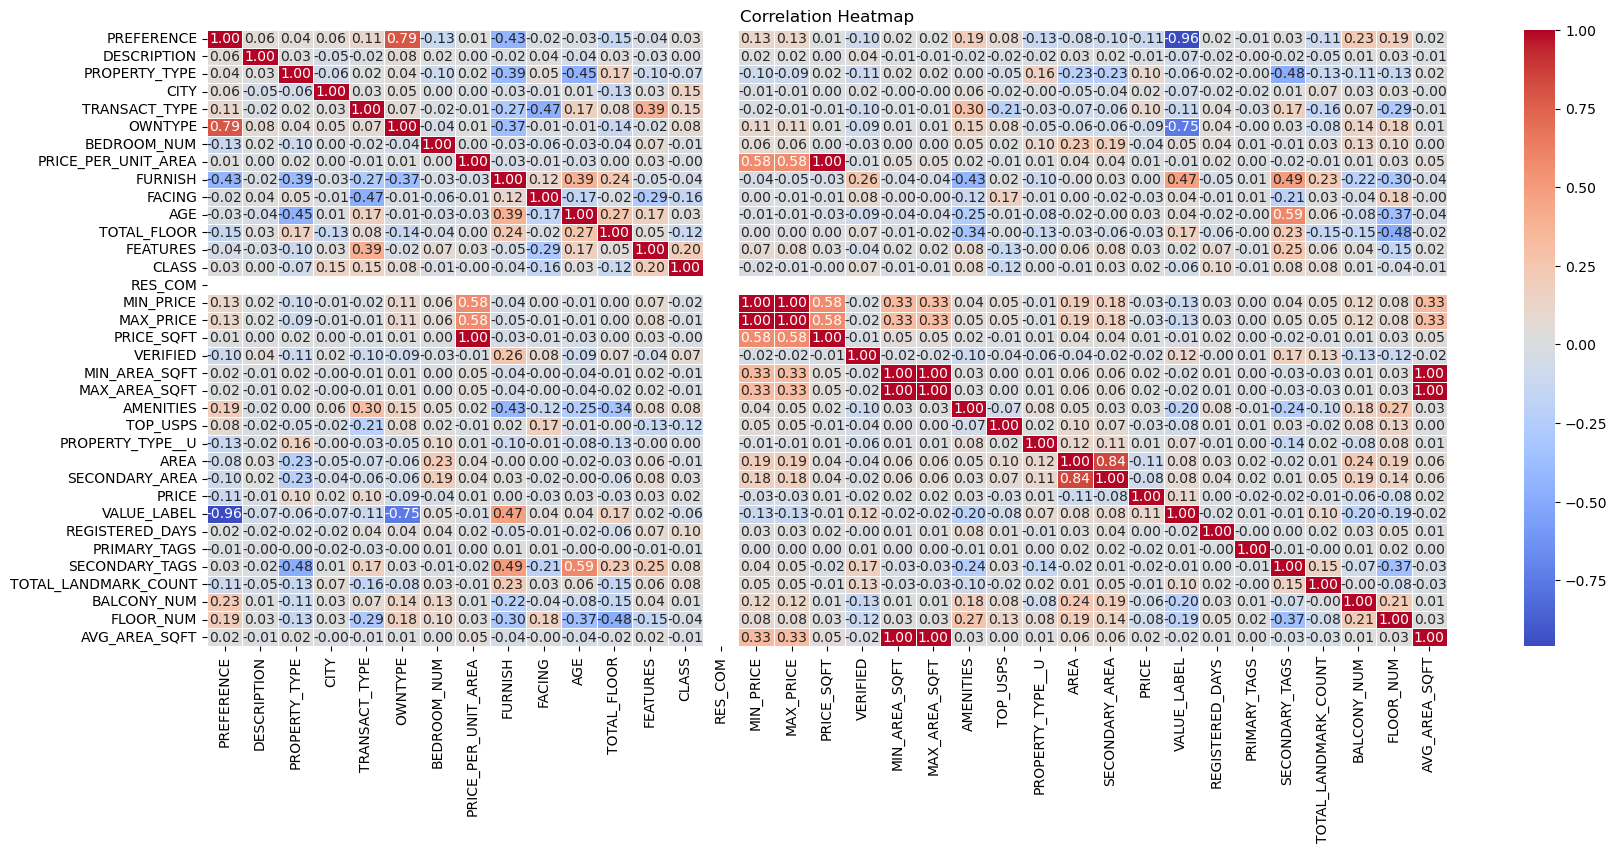

In [266]:
plt.figure(figsize=(20, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [268]:
# 3. Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

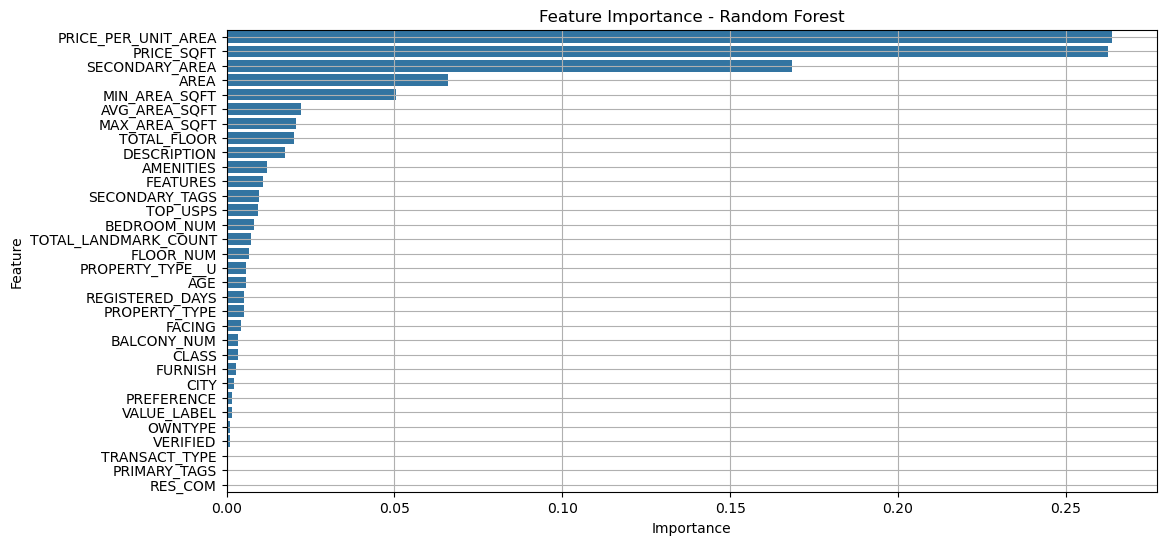

In [270]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.grid(True)
plt.show()

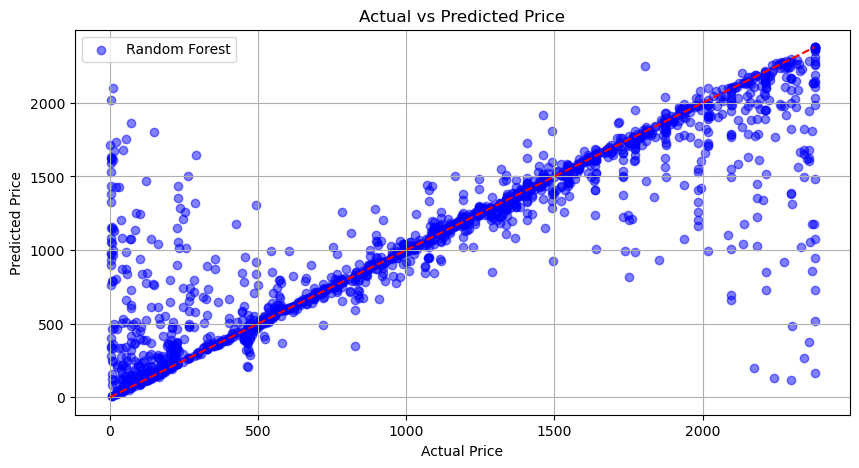

In [304]:
# 4. Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.grid(True)
plt.show()
